# Convolutional Neural Network for a Reptile-Amphibian Clasificator using PyTorch.  
## Fine-Tuning to Resnet50. Local Training with CPU.

#### First, I am going to edit the Dataset.   
#### I will slpit each type of animal in two categories: Amphibians and Reptiles. For that, I am going to create two new folders.

In [1]:
import os
import shutil

# Dictionary to classify folders into Amphibians and Reptiles
clasification = {
    "Frog": "Amphibians",
    "Salamander": "Amphibians",
    "Toad": "Amphibians",
    "Chameleon": "Reptiles",
    "Crocodile_Alligator": "Reptiles",
    "Gecko": "Reptiles",
    "Iguana": "Reptiles",
    "Lizard": "Reptiles",
    "Snake": "Reptiles",
    "Turtle_Tortoise": "Reptiles"
}

data_route = "Datasets/ReptileAndAmphibiansDataset/"

# Routes for the new Amphibians and Reptiles folders
amphibians_route = os.path.join(data_route, "Amphibians")
repltiles_route = os.path.join(data_route, "Reptiles")

# Create folders if they do not exist
os.makedirs(amphibians_route, exist_ok=True)
os.makedirs(repltiles_route, exist_ok=True)

# Go through each folder and copy the images to the corresponding new folder
for folder in clasification:
    origin_route = os.path.join(data_route, folder)
    destination_route = amphibians_route if clasification[folder] == "Amphibians" else repltiles_route
    
    for file in os.listdir(origin_route):
        file_origin_route = os.path.join(origin_route, file)
        file_destination_route = os.path.join(destination_route, file)
        
        # Copy file
        shutil.copy2(file_origin_route, file_destination_route)

print("Files copied successfully.")


Files copied successfully.


#### Let's check the size of our dataset.

In [3]:
import os

data_route = "Datasets/ReptileAndAmphibiansDataset"

# Count images in each subfolder
counts = {}
for folder in os.listdir(data_route):
    folder_route = os.path.join(data_route, folder)
    if os.path.isdir(folder_route):
        image_number = len([file for file in os.listdir(folder_route) if os.path.isfile(os.path.join(folder_route, file))])
        counts[folder] = image_number

# Print the number of images per folder
for folder, count in counts.items():
    print(f"Folder '{folder}': {count} images")

Folder 'Amphibians': 1476 images
Folder 'Chameleon': 210 images
Folder 'Crocodile_Alligator': 692 images
Folder 'dataset': 0 images
Folder 'Frog': 499 images
Folder 'Gecko': 289 images
Folder 'Iguana': 481 images
Folder 'Lizard': 500 images
Folder 'Reptiles': 4488 images
Folder 'Salamander': 484 images
Folder 'Snake': 500 images
Folder 'Toad': 497 images
Folder 'Turtle_Tortoise': 1862 images


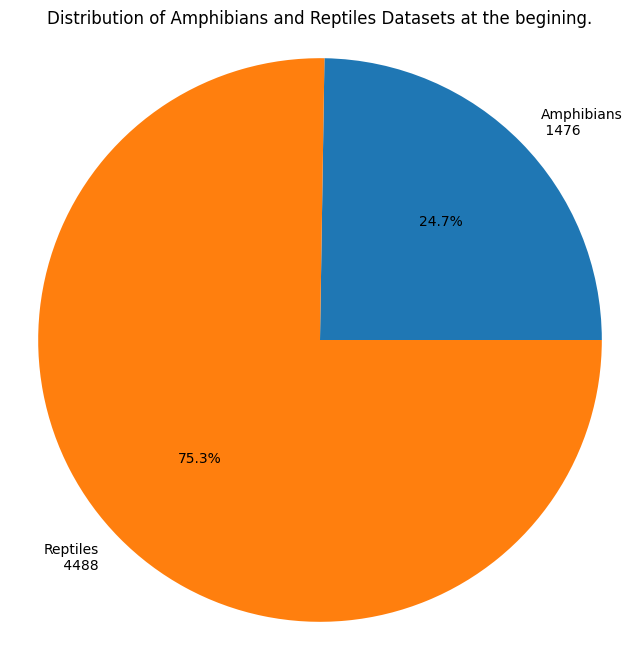

In [5]:
import matplotlib.pyplot as plt

# Data
sizes = [x for x in list(counts.values()) if (counts["Amphibians"]==x or counts["Reptiles"]==x)]
labels = [f"Amphibians\n {sizes[0] if sizes[0]==counts['Amphibians'] else sizes[1]}", f"Reptiles\n {sizes[0] if sizes[0]==counts['Reptiles'] else sizes[1]}"]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Distribution of Amphibians and Reptiles Datasets at the begining.')
plt.show()

Note that we have two potential problems:  
1-Few Images.  
2-More Reptiles than Amphibians.

### Let's do some Data Augmentation.

In [4]:
import os
from PIL import Image
import torchvision.transforms as transforms

def augment_images(folder_path):
    # Data Augmentation Tranformations
    transformaciones = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(30),
        transforms.ColorJitter(brightness=0.5),
    ])

    # List files in folder
    files = [file for file in os.listdir(folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

    # Apply transformations and save the new images
    for file in files:
        file_route = os.path.join(folder_path, file)
        image = Image.open(file_route)
        transformed_image = transformaciones(image)

        # Convert to RGB if necessary
        if transformed_image.mode == 'RGBA':
            transformed_image = transformed_image.convert('RGB')

        # Save the new image
        file_name, extension = os.path.splitext(file)
        transformed_image.save(os.path.join(folder_path, f"{file_name}_aug{extension}"))

amphibians_route = "Datasets/ReptileAndAmphibiansDataset/Amphibians"
repltiles_route = "Datasets/ReptileAndAmphibiansDataset/Reptiles"

# Apply Data Augmentation to each folder
augment_images(amphibians_route)
augment_images(repltiles_route)

print("Data Augmentation finnished.")


Data Augmentation finnished.


### Now let's see the new size of the Dataset.

In [1]:
import os
data_route = "Datasets/ReptileAndAmphibiansDataset"

# Count images in each subfolder
counts = {}
for folder in os.listdir(data_route):
    folder_route = os.path.join(data_route, folder)
    if os.path.isdir(folder_route):
        image_number = len([file for file in os.listdir(folder_route) if os.path.isfile(os.path.join(folder_route, file))])
        counts[folder] = image_number

# Print the number of images per folder
for folder, count in counts.items():
    print(f"Folder '{folder}': {count} images")

Folder 'Amphibians': 2952 images
Folder 'Chameleon': 210 images
Folder 'Crocodile_Alligator': 692 images
Folder 'dataset': 0 images
Folder 'Frog': 499 images
Folder 'Gecko': 289 images
Folder 'Iguana': 481 images
Folder 'Lizard': 500 images
Folder 'Reptiles': 8768 images
Folder 'Salamander': 484 images
Folder 'Snake': 500 images
Folder 'Toad': 497 images
Folder 'Turtle_Tortoise': 1862 images


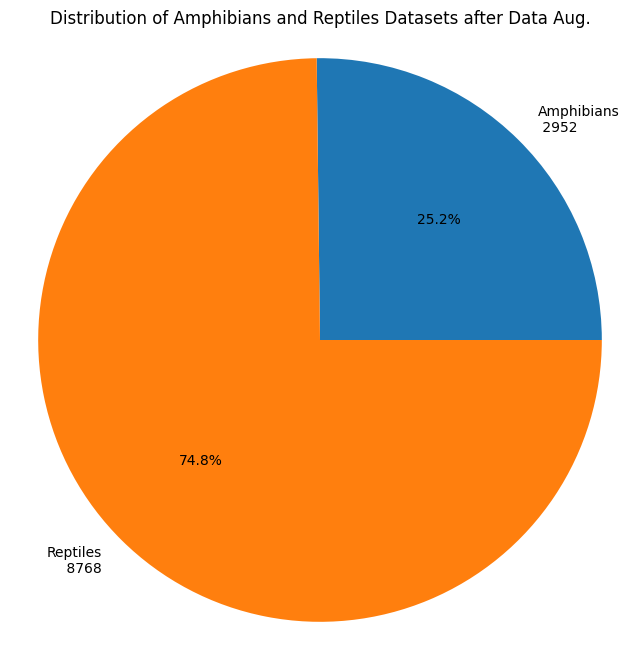

In [3]:
import matplotlib.pyplot as plt

# Data
sizes = [x for x in list(counts.values()) if (counts["Amphibians"]==x or counts["Reptiles"]==x)]
labels = [f"Amphibians\n {sizes[0] if sizes[0]==counts['Amphibians'] else sizes[1]}", f"Reptiles\n {sizes[0] if sizes[0]==counts['Reptiles'] else sizes[1]}"]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Distribution of Amphibians and Reptiles Datasets after Data Aug.')
plt.show()

### Let's load the images and divide them into Training and Validation

In [10]:
import os
import shutil
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import random_split

# Create a parent folder and move Amphibians and Reptiles into it
data_route = 'Datasets/ReptileAndAmphibiansDataset/dataset'
os.makedirs(data_route, exist_ok=True)
if(not os.path.exists(data_route+"/Amphibians")):
    shutil.move('Datasets/ReptileAndAmphibiansDataset/Amphibians', data_route)
if(not os.path.exists(data_route+"/Reptiles")):
    shutil.move('Datasets/ReptileAndAmphibiansDataset/Reptiles', data_route)

# Images transformations
transformations = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor()
])

# Load the dataset
dataset = torchvision.datasets.ImageFolder(root=data_route, transform=transformations)

# Size of training and test sets
train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size

# Split the dataset into training and validation sets
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print(f"Training: {len(train_dataset)} images, Validation: {len(test_dataset)} images")


Training: 9540 images, Validation: 2386 images


In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


## Let's load the Resnet50 and start training.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader

# Loading pretrained model
model = models.resnet50(pretrained=True)

# Freeze parameters
for param in model.parameters():
    param.requires_grad = False

# Modify the last fully connected layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # 2 outputs: Amphibians and Reptiles

# Define a training device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(device)

/home/danielhp/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/danielhp/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/danielhp/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [01:51<00:00, 916kB/s] 


cpu


In [10]:
import matplotlib.pyplot as plt
# Define the loss criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# DataLoader for training and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


def calculate_presicion(outputs, labels):
    _, preds = torch.max(outputs, 1)
    return torch.sum(preds == labels).item()

def train_model(model, criterion, optimizer, num_epochs=10):
    train_loss_history = []
    train_acc_history = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += calculate_presicion(outputs, labels)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = running_corrects / len(train_loader.dataset)

        train_loss_history.append(epoch_loss)
        train_acc_history.append(epoch_acc)

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

    return model, train_loss_history, train_acc_history

### First Training

In [11]:
trained_model, loss_history, acc_history = train_model(model, criterion, optimizer, num_epochs=10)

Epoch 1/10, Loss: 0.2129, Accuracy: 0.9240
Epoch 2/10, Loss: 0.1703, Accuracy: 0.9370
Epoch 3/10, Loss: 0.1605, Accuracy: 0.9437
Epoch 4/10, Loss: 0.1584, Accuracy: 0.9425
Epoch 5/10, Loss: 0.1545, Accuracy: 0.9450
Epoch 6/10, Loss: 0.1540, Accuracy: 0.9455
Epoch 7/10, Loss: 0.1686, Accuracy: 0.9406
Epoch 8/10, Loss: 0.1443, Accuracy: 0.9496
Epoch 9/10, Loss: 0.1419, Accuracy: 0.9474
Epoch 10/10, Loss: 0.1505, Accuracy: 0.9456


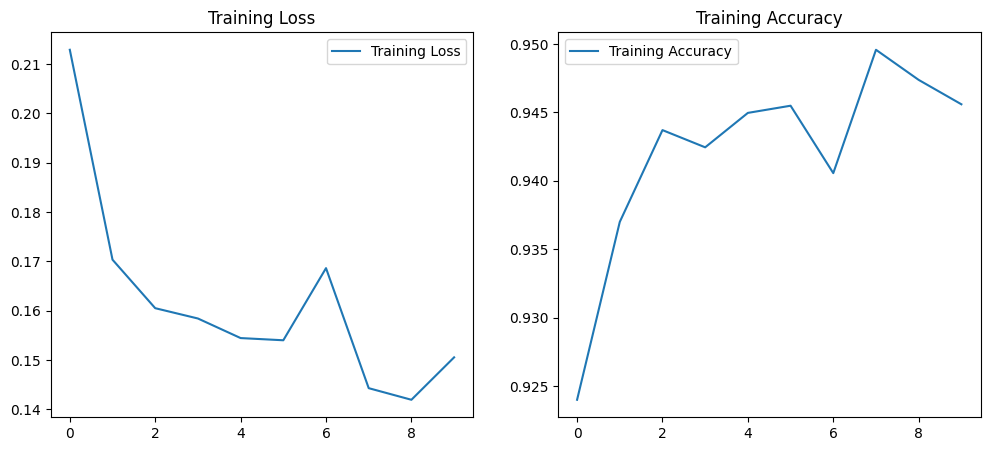

In [12]:
# Graph Loss and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc_history, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

### Second Training

In [14]:
# Unfreeze all layers of the model
for param in model.parameters():
    param.requires_grad = True

# Define the optimizer again (now for all layers)
optimizer_fine_tuning = optim.Adam(model.parameters(), lr=0.0001)  # Lower learning rate

# We will reuse the previous training function

# Fine-tuning of the model
trained_model_fine_tuned, loss_history_fine_tuned, acc_history_fine_tuned = train_model(
    model, criterion, optimizer_fine_tuning, num_epochs=5)  # Reduced number of epochs for fine-tuning

Epoch 1/5, Loss: 0.1393, Accuracy: 0.9499
Epoch 2/5, Loss: 0.0627, Accuracy: 0.9783
Epoch 3/5, Loss: 0.0525, Accuracy: 0.9814
Epoch 4/5, Loss: 0.0356, Accuracy: 0.9883
Epoch 5/5, Loss: 0.0260, Accuracy: 0.9920


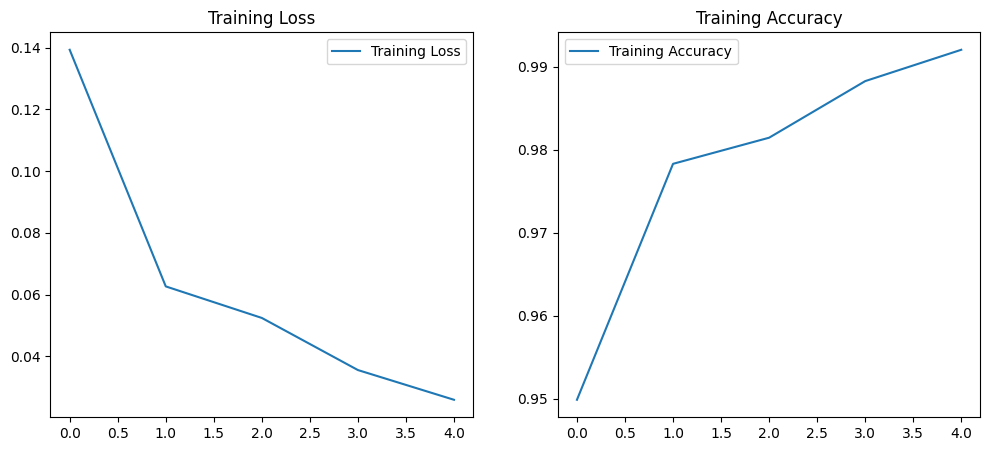

In [22]:
# Graph Loss and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_history_fine_tuned, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(acc_history_fine_tuned, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()

### Saving the model

In [15]:
torch.save(model.state_dict(), 'resnet50_amphibians_reptiles.pth')

### Let's show some interesting data:

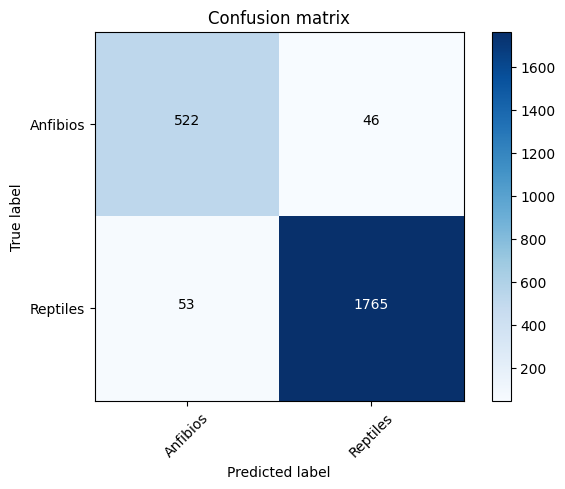

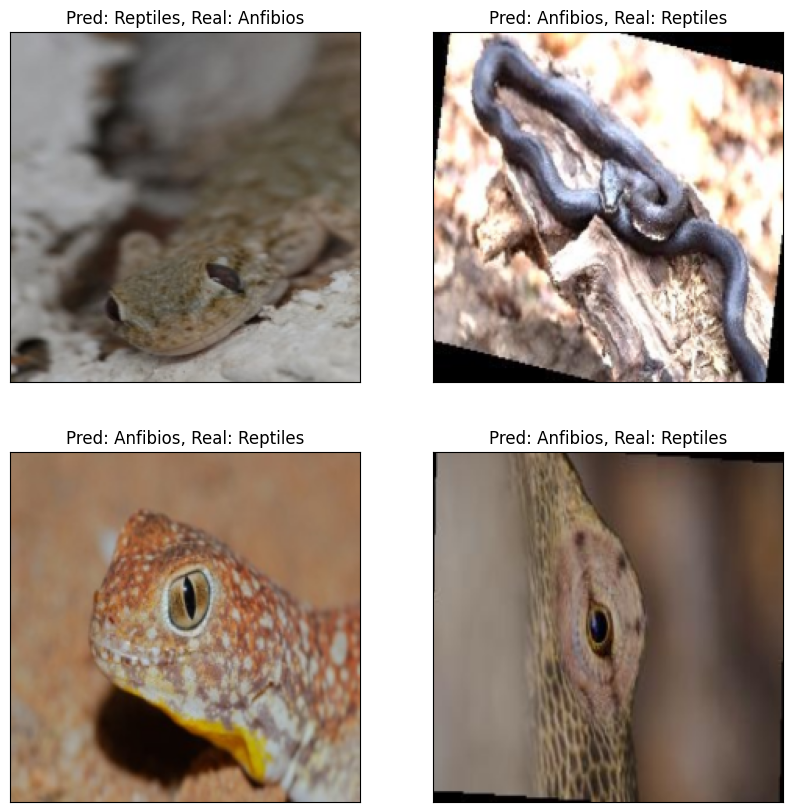

In [24]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Function to display the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Calculate predictions
y_pred = []
y_true = []

model.eval()  # Set model to evaluation mode

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        y_pred.extend(preds.view(-1).tolist())
        y_true.extend(labels.view(-1).tolist())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, classes=['Amphibians', 'Reptiles'])

# Show wrong predictions
fig = plt.figure(figsize=(10, 10))

incorrects = np.where(np.array(y_pred) != np.array(y_true))[0]
if incorrects.size > 0:
    for i, incorrect in enumerate(incorrects[:4]):  # Show only the first 4
        ax = fig.add_subplot(2, 2, i+1, xticks=[], yticks=[])
        img, label = test_dataset[incorrect]
        img = img.cpu().numpy().transpose((1, 2, 0))
        ax.imshow(img)
        ax.set_title(f'Pred: {["Amphibians", "Reptiles"][y_pred[incorrect]]}, Real: {["Amphibians", "Reptiles"][y_true[incorrect]]}')

plt.show()